In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

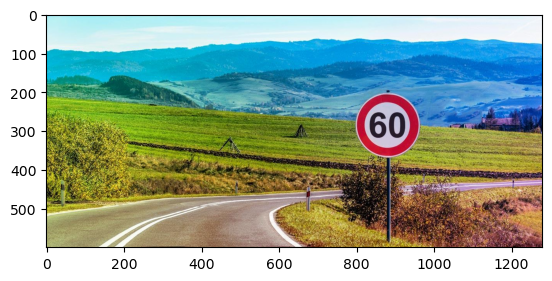

In [71]:
img = cv.imread('st30.jpg',cv.IMREAD_COLOR)
img = cv.imread('60lejos.jpeg',cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

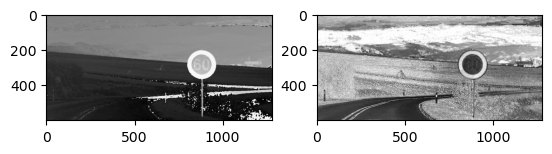

In [72]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HLS)
h,s,l = cv.split(hsv)

plt.subplot(1,2,1)
plt.imshow(h,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(l,cmap='gray')

plt.show()

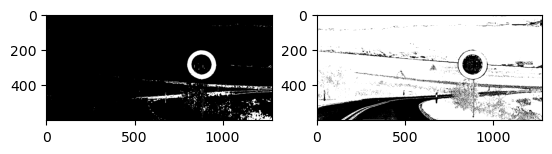

In [73]:
aux, bin_h = cv.threshold(h, 150, 255, cv.THRESH_BINARY)
aux, bin_l = cv.threshold(l, 80, 255, cv.THRESH_BINARY)

plt.subplot(1,2,1)
plt.imshow(bin_h,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(bin_l,cmap='gray')

plt.show()

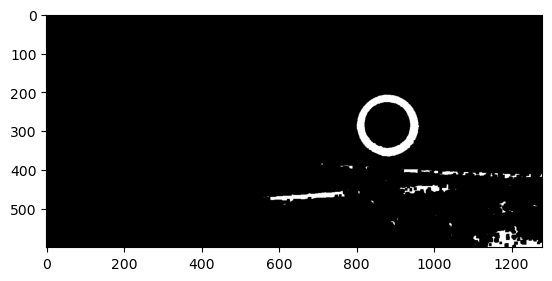

In [74]:
bin_h_expanded = cv.dilate(bin_h, np.ones((3,3),np.uint8), iterations = 1)
forms = bin_h_expanded & bin_l
forms = cv.erode(forms, np.ones((3,3),np.uint8), iterations = 3)

plt.imshow(forms, cmap = 'gray')

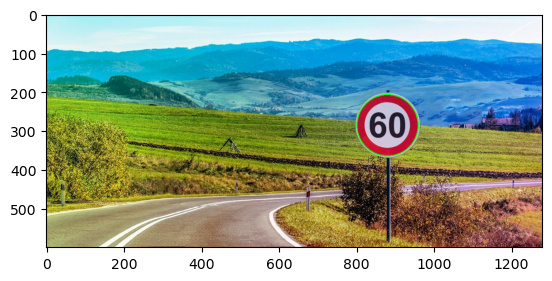

In [75]:
minDist = 100
param1 = 30 #500
param2 = 80 #200 
minRadius = 5
maxRadius = int(forms.shape[0]/2) #10

circles = cv.HoughCircles(forms, cv.HOUGH_GRADIENT, dp=1.9, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
circles = np.uint16(np.around(circles))

img_with_circles = img.copy()

for c in circles[0,:]:
    a, b, r = c[0], c[1], c[2]
    cv.circle(img_with_circles, (a, b), r, (0, 255, 0), 2)

plt.imshow(cv.cvtColor(img_with_circles,cv.COLOR_BGR2RGB))

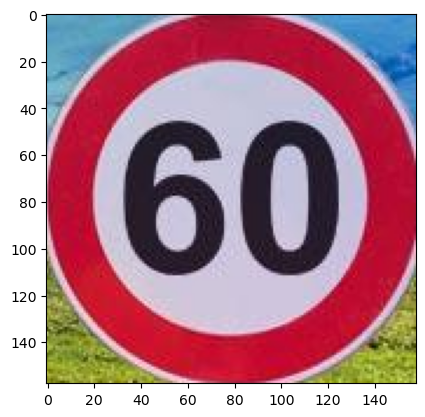

In [76]:
a = circles[0][0][0]
b = circles[0][0][1]
r = circles[0][0][2]
r = int(r)

cropped = img[b-r:b+r, a-r:a+r]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

In [77]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(cropped, config='--psm 11')
print("La velocidad limite es " + text)

La velocidad limite es 60

